<a href="https://colab.research.google.com/github/KarolB29/Python-Data-Analysis/blob/main/LinReg_Model_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ceny nieruchomości w King County**

*   id – identyfikator nieruchomości
*   date – data wystawienia nieruchomości na sprzedaż
*   *price – cena nieruchomości (nasza zmienna objaśniana)*
*   bedrooms – liczba sypialni
*   bathrooms – liczba łazienek
*   sqft_living – powierzchnia użytkowa domu w stopach kwadratowych
*   sqft_lot – powierzchnia działki w stopach kwadratowych
*   floors – liczba pięter
*   waterfront – informacja czy dom jest przy nabrzeżu
*   condition – stan nieruchomości wyrażony w skali od 1 do 5
*   grade – jakość konstrukcji (im większa wartość, tym lepsza jakość, a także *   większy koszt jednostkowy wybudowania nieruchomości)
*   sqft_above – powierzchnia domu powyżej poziomu gruntu
*   sqft_basement – powierzchnia domu poniżej poziomu gruntu
*   yr_built – rok budowy
*   yr_renovated – rok remontu (jeżeli nieruchomość nie była odnawiana, wtedy *   zmienna przyjmuje wartość 0)
*   zipcode – kod pocztowy nieruchomości
*   lat – szerokość geograficzna, na której położona jest nieruchomość
*   long – długość geograficzna, na której położona jest nieruchomość
*   sqft_living15 – średnia powierzchnia użytkowa domu dla 15 najbliżej *   położonych nieruchomości
*   sqft_lot15 - średnia powierzchnia działki dla 15 najbliżej położonych nieruchomości


**W zmiennej *price* przechowywana jest cena nieruchomości wyrażona w dolarach amerykańskich (USD)**

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as ex
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
housing_df = pd.read_csv('/content/drive/MyDrive/coderslab/MachineLearning/MAL_zjazd 1/DzieS 1/kc_house_data.csv', encoding='utf-8')
housing_df.head(5)

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [ ]:
housing_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
housing_df.drop(columns=['id', 'date'], inplace=True)

In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [ ]:
housing_df.drop_duplicates(inplace=True)
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21608 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21608 non-null  float64
 1   bedrooms       21608 non-null  int64  
 2   bathrooms      21608 non-null  float64
 3   sqft_living    21608 non-null  int64  
 4   sqft_lot       21608 non-null  int64  
 5   floors         21608 non-null  float64
 6   waterfront     21608 non-null  int64  
 7   view           21608 non-null  int64  
 8   condition      21608 non-null  int64  
 9   grade          21608 non-null  int64  
 10  sqft_above     21608 non-null  int64  
 11  sqft_basement  21608 non-null  int64  
 12  yr_built       21608 non-null  int64  
 13  yr_renovated   21608 non-null  int64  
 14  zipcode        21608 non-null  int64  
 15  lat            21608 non-null  float64
 16  long           21608 non-null  float64
 17  sqft_living15  21608 non-null  int64  
 18  sqft_lot15 

In [ ]:
housing_df.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.160800e+04  21608.000000  21608.000000  21608.000000  2.160800e+04   
mean   5.400984e+05      3.370927      2.114738   2079.958950  1.510962e+04   
std    3.671646e+05      0.930103      0.770238    918.505805  4.142491e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.218375e+05      3.000000      1.750000   1429.250000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.620000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.069050e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21608.000000  21608.000000  21608.000000  21608.000000  21608.000000   
mean       1.494146      0.007544      0.234219      3.409478      7.656655   
std        0.539910      0.086527      0.766169      0.650782      1.175484   
min        1.000000      0.000000      0.000000      1.000000      1.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated       zipcode  \
count  21608.000000   21608.000000  21608.000000  21608.000000  21608.000000   
mean    1788.414846     291.544104   1970.999907     84.330155  98077.942614   
std      828.141155     442.612560     29.371463    401.517026     53.506883   
min      290.000000       0.000000   1900.000000      0.000000  98001.000000   
25%     1190.000000       0.000000   1951.000000      0.000000  98033.000000   
50%     1560.000000       0.000000   1975.000000      0.000000  98065.000000   
75%     2210.000000     560.000000   1997.000000      0.000000  98118.000000   
max     9410.000000    4820.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21608.000000  21608.000000   21608.000000   21608.000000  
mean      47.560050   -122.213894    1986.583164   12770.108340  
std        0.138578      0.140830     685.421474   27307.006892  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.470875   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.230500    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.250000  
max       47.777600   -121.315000    6210.000000  871200.000000

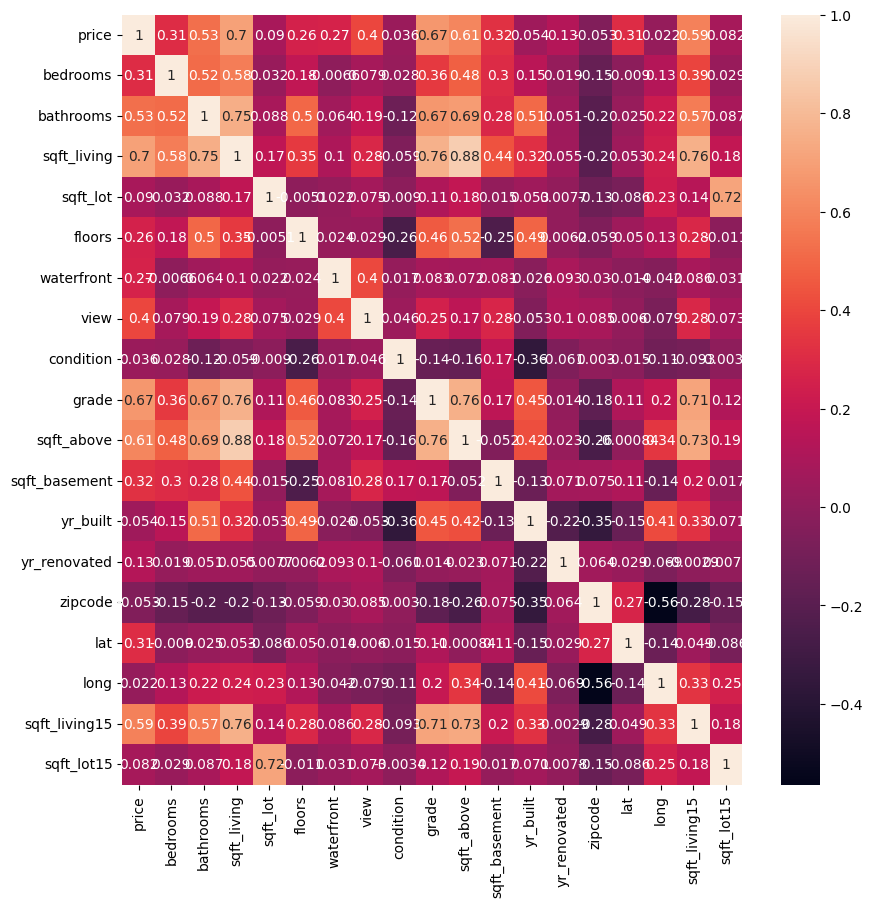

In [ ]:
corr_matrix = housing_df.corr(method="pearson")

plt.figure(figsize=(10, 10))
corr_plot = sns.heatmap(corr_matrix, annot=True)

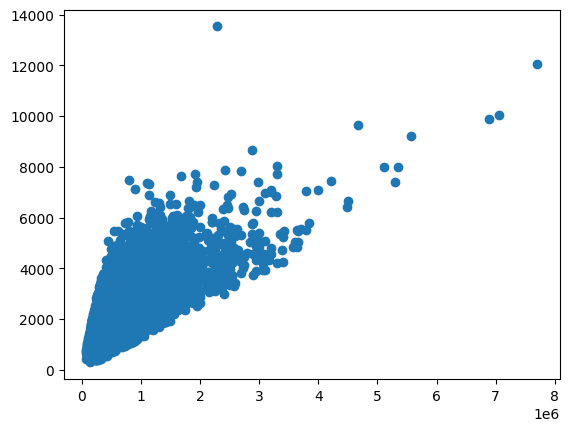

In [ ]:
plt.scatter(housing_df['price'], housing_df['sqft_living'])

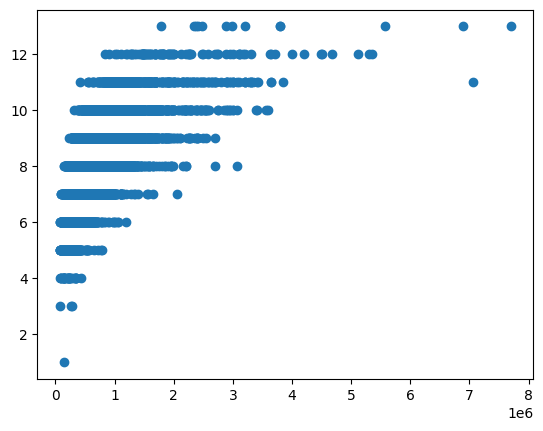

In [ ]:
plt.scatter(housing_df['price'], housing_df['grade'])

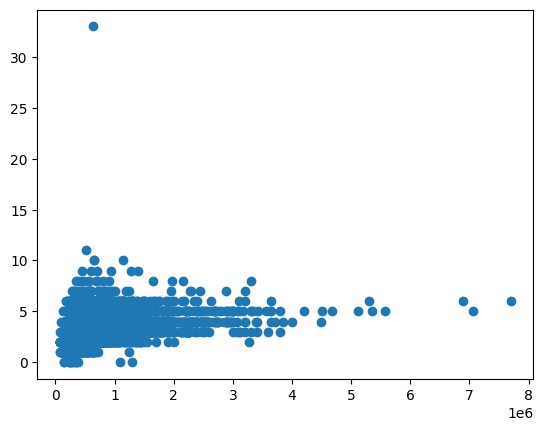

In [ ]:
plt.scatter(housing_df['price'], housing_df['bedrooms'])

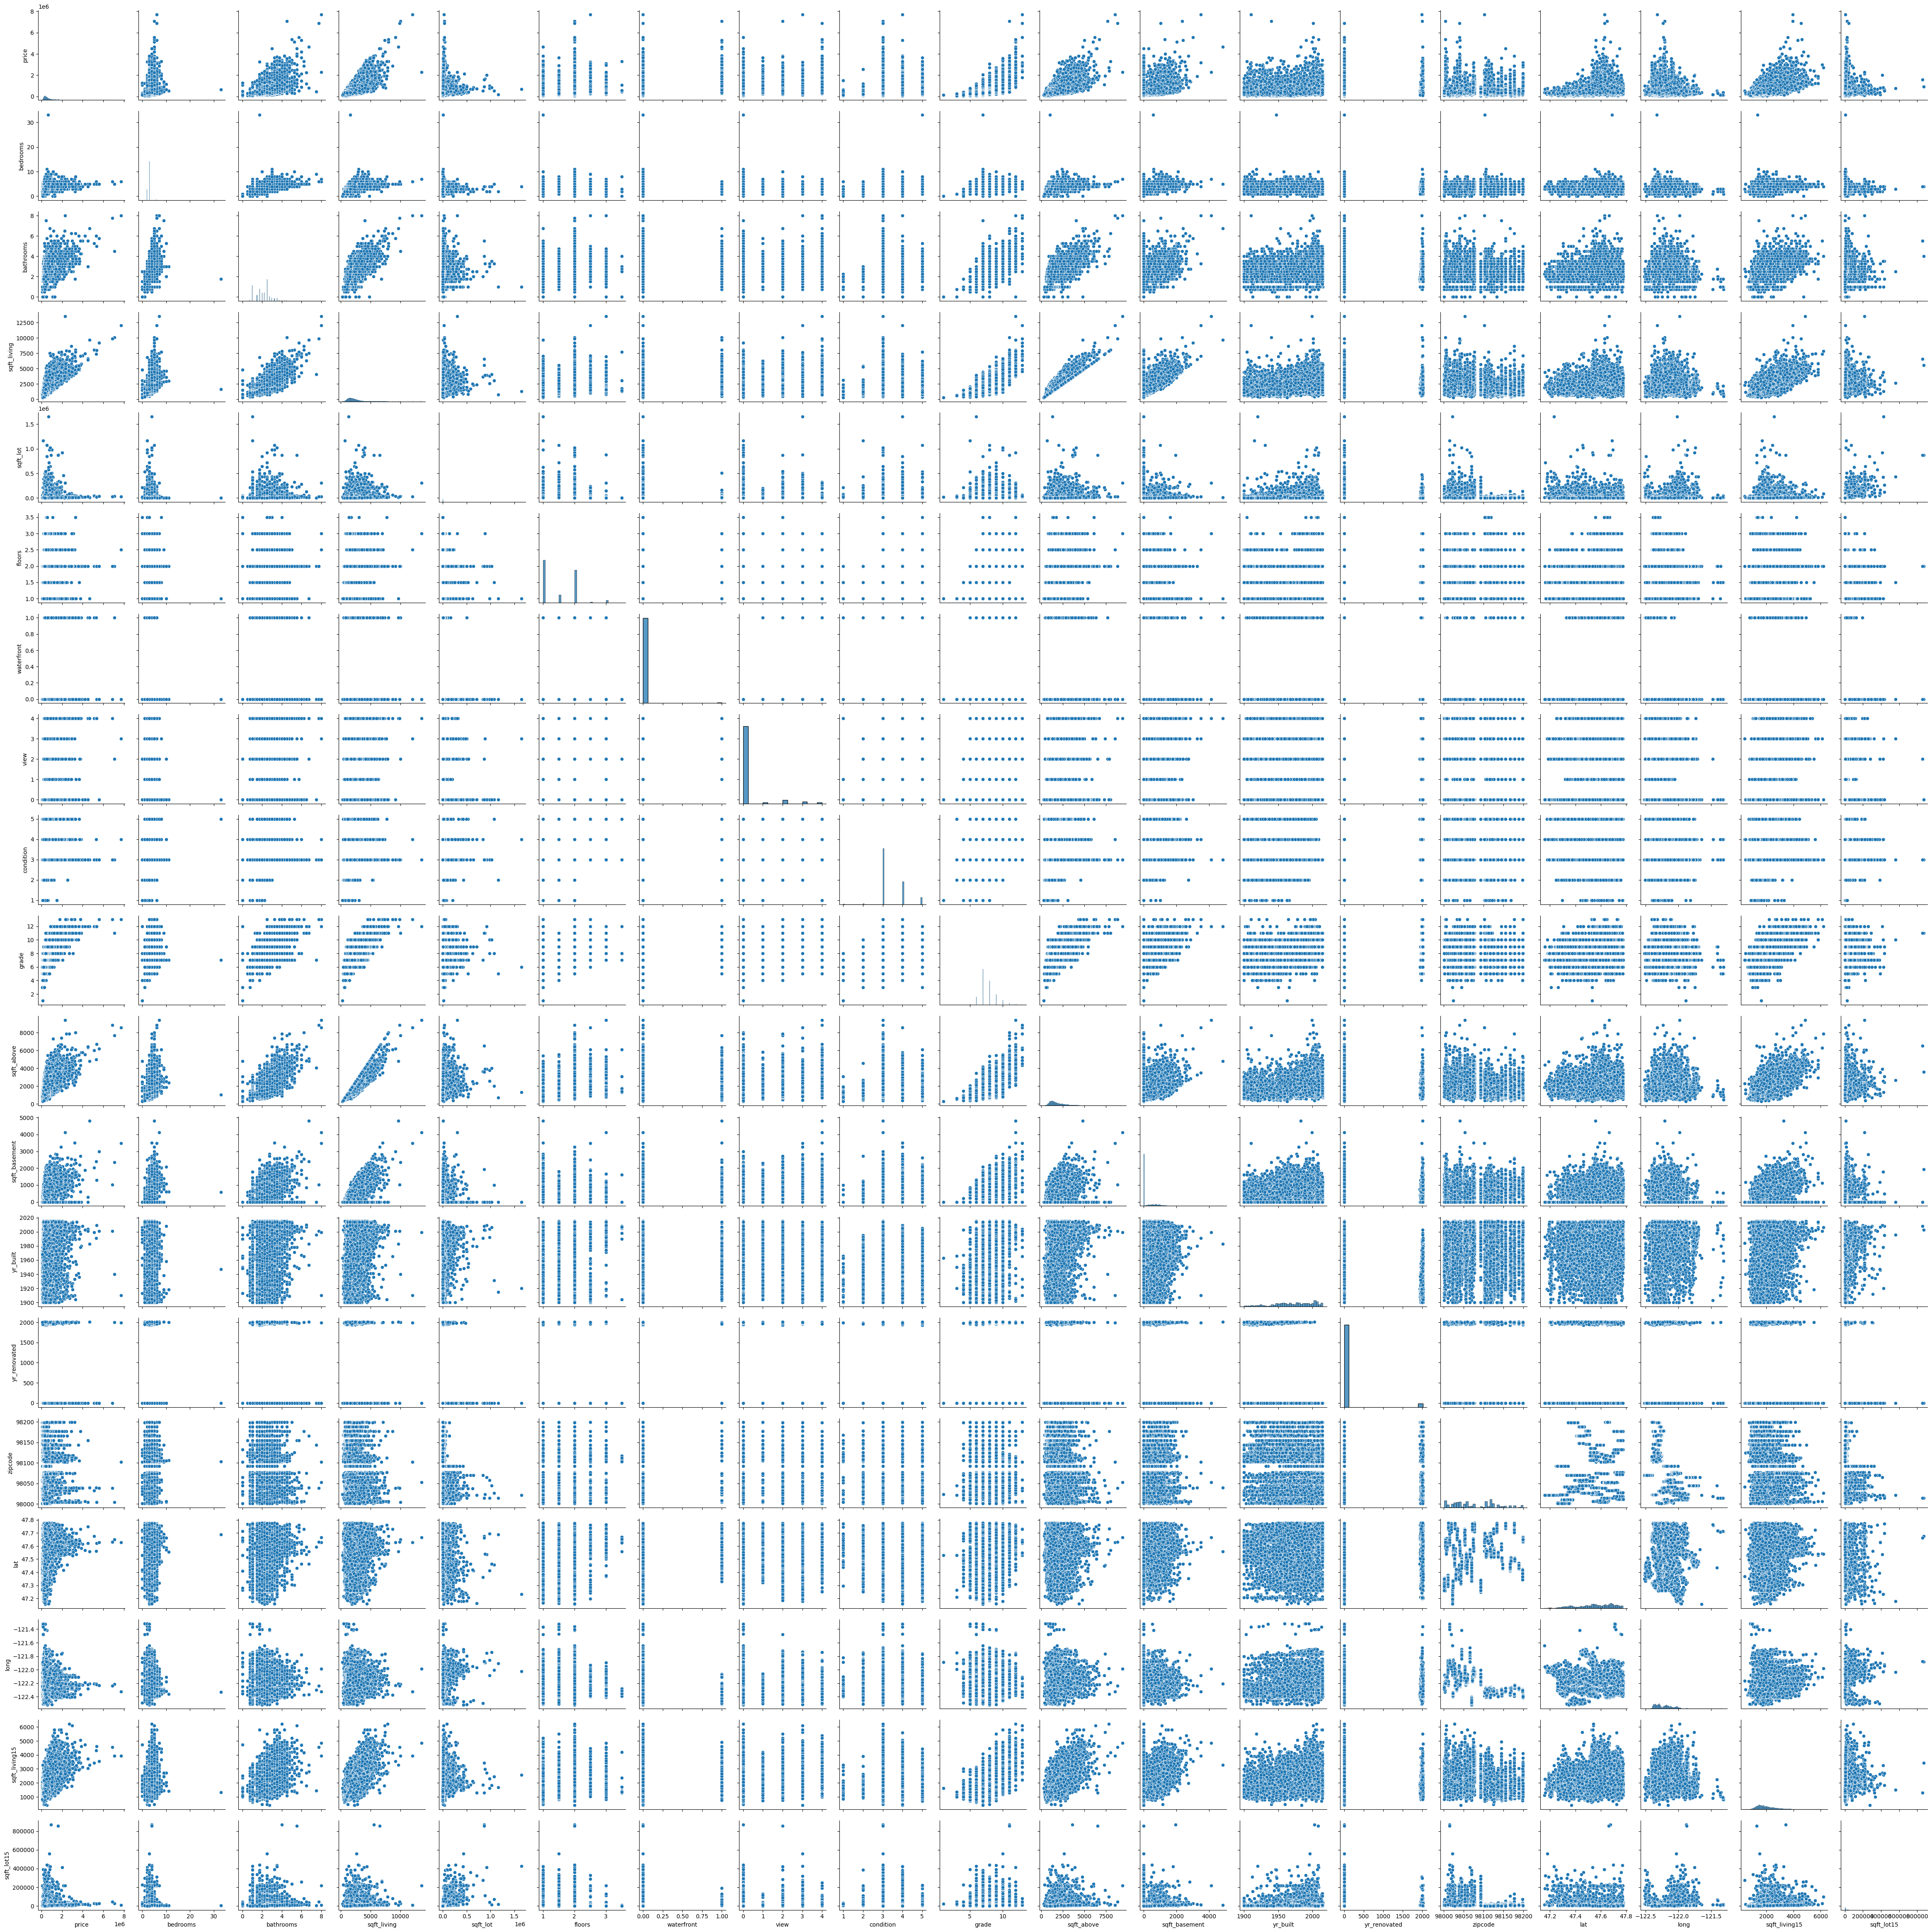

In [ ]:
sns.pairplot(housing_df)

In [ ]:
housing_df = housing_df[housing_df["bedrooms"] != 33]
housing_df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98125  47.7210 -122.319           1690        7639  
2    98028  47.7379 -122.233           2720        8062  
3    98136  47.5208 -122.393           1360        5000  
4    98074  47.6168 -122.045           1800        7503

In [ ]:
X = housing_df.drop(["price"], axis=1)
y = housing_df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Array of coefficents from a1 to a18. a1 stands for coeficient for "bedrooms", a2 - "bathrooms" etc.
# The order of the coefficients coincides with the order of the variables in the data set
print(f"Coefficients values: {lin_reg.coef_}")

# Intercept coefficient
print(f"Intercept coefficient value: {lin_reg.intercept_}")


Coefficients values: [-3.84852994e+04  4.13263188e+04  1.12428724e+02  2.96824213e-02
  6.14344665e+03  6.07162713e+05  5.09302905e+04  2.44718442e+04
  9.69361225e+04  7.20202236e+01  4.04085010e+01 -2.68712160e+03
  1.74290059e+01 -5.87598236e+02  5.92606863e+05 -2.02590503e+05
  1.87809714e+01 -3.69345057e-01]
Intercept coefficient value: 9304046.490116945


In [ ]:
y_pred = lin_reg.predict(X_test)

In [ ]:
# Print R2 score value with .score() method
print(f"R2 score: {lin_reg.score(X_test, y_test)}") # or X_train, y_train for training set score

# Alternatively - R2 score using r2_score from sklearn.metrics
from sklearn.metrics import r2_score

print(r2_score(y_test, y_pred))

R2 score: 0.7035639448793709
0.7035639448793709


In [ ]:
housing_df.drop(columns=["floors", "sqft_living15", "sqft_lot15", "zipcode", "waterfront", "view", "lat",	"long"], inplace=True)
housing_df.head(5)

price  bedrooms  bathrooms  sqft_living  sqft_lot  condition  grade  \
0  221900.0         3       1.00         1180      5650          3      7   
1  538000.0         3       2.25         2570      7242          3      7   
2  180000.0         2       1.00          770     10000          3      6   
3  604000.0         4       3.00         1960      5000          5      7   
4  510000.0         3       2.00         1680      8080          3      8   

   sqft_above  sqft_basement  yr_built  yr_renovated  
0        1180              0      1955             0  
1        2170            400      1951          1991  
2         770              0      1933             0  
3        1050            910      1965             0  
4        1680              0      1987             0

In [ ]:
X = housing_df.drop(["price"], axis=1)
y = housing_df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)


print(f"R2 score: {lin_reg.score(X_test, y_test)}")
print(r2_score(y_test, y_pred))

R2 score: 0.6175208275730507
0.6175208275730507


After removing columns "floors", "sqft_living15", "sqft_lot15", "zipcode", "waterfront", "view", "lat",	"long" R^2 dropped significantly, so it is better to keep them in the model depsite its correlation with each other.



Coefficients values are:
[-3.84852994e+04  4.13263188e+04  1.12428724e+02  2.96824213e-02
  6.14344665e+03  6.07162713e+05  5.09302905e+04  2.44718442e+04
  9.69361225e+04  7.20202236e+01  4.04085010e+01 -2.68712160e+03
  1.74290059e+01 -5.87598236e+02  5.92606863e+05 -2.02590503e+05
  1.87809714e+01 -3.69345057e-01]
Intercept coefficient value: 9304046.490116945

So, the equation to predict price will be:

price =
*  bedrooms * -3.84852994e+04 +
*  bathrooms * 4.13263188e+04 +
*  sqft_living 	* 1.12428724e+02 +
*   sqft_lot 	* 2.96824213e-02 +
*   floors 	* 6.14344665e+03 +
*   waterfront *	6.07162713e+05 +
*   view *	5.09302905e+04 +
*   condition * 2.44718442e+04 +
*   grade *	9.69361225e+04 +
*   sqft_above * 7.20202236e+01 +
*   sqft_basement *	4.04085010e+01 +
*   yr_built *	-2.68712160e+03 +
*   yr_renovated *	1.74290059e+01 +
*   zipcode * -5.87598236e+02 +
*   lat * 5.92606863e+05 +
*   long 	* -2.02590503e+05 +
*   sqft_living15 * 1.87809714e+01 +
*   sqft_lot15 * -3.69345057e-01
*  + +9304046.490116945